# **Visualise Person**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
person = pd.read_csv('/content/person_no_null.csv')
person

,PERSON_ID,PERSON_SOURCE_VALUE,GENDER_SOURCE_VALUE,RACE_SOURCE_VALUE,ETHNICITY_SOURCE_VALUE,AGE
0,6,001f4a87-70d0-435c-a4b9-1425f6928d33,F,black,west_indian,61
1,123,052d9254-80e8-428f-b8b6-69518b0ef3f3,M,white,italian,75
2,129,054d32d5-904f-4df4-846b-8c08d165b4e9,M,white,polish,50
3,16,00444703-f2c9-45c9-a247-f6317a43a929,F,white,american,53
4,65,02a3dad9-f9d5-42fb-8074-c16d45b4f5c8,F,black,dominican,58
...,...,...,...,...,...,...
2689,5322,fec063f0-ef29-49e4-b7b6-c46d8f153393,M,white,english,78
2690,5265,fc180a73-ad0e-4b76-9b0c-20bf1848b9c6,M,white,portuguese,57
2691,4999,eedee7e1-59de-4a14-b123-5bf3a9ed6082,F,white,irish,68
2692,5201,f965b46d-fc51-48c9-ad2f-62f6b16ad55d,F,white,italian,47


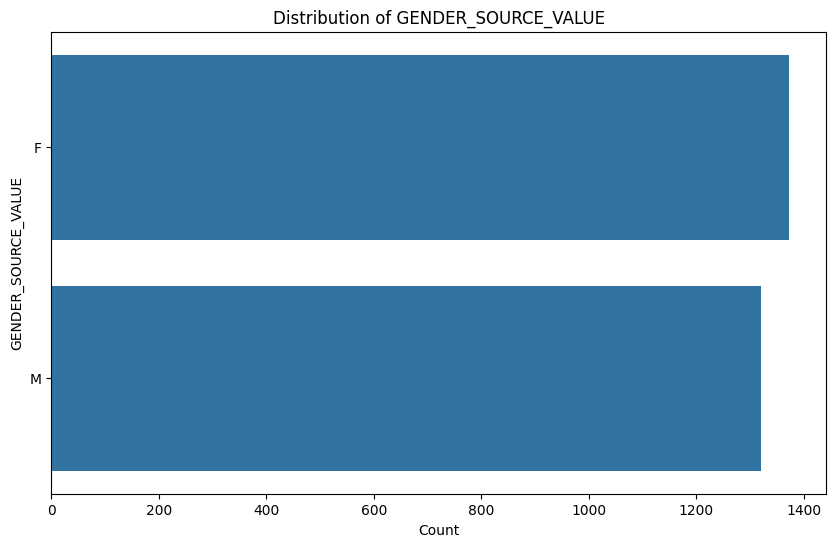

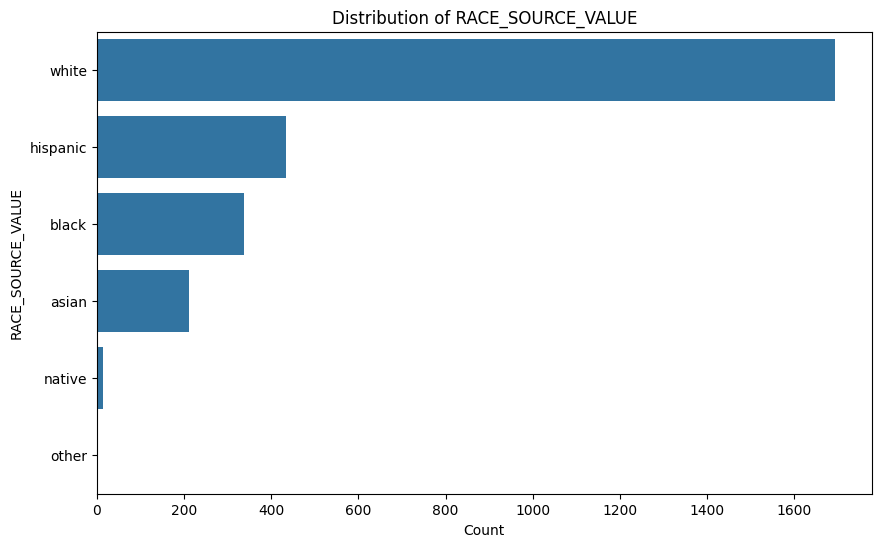

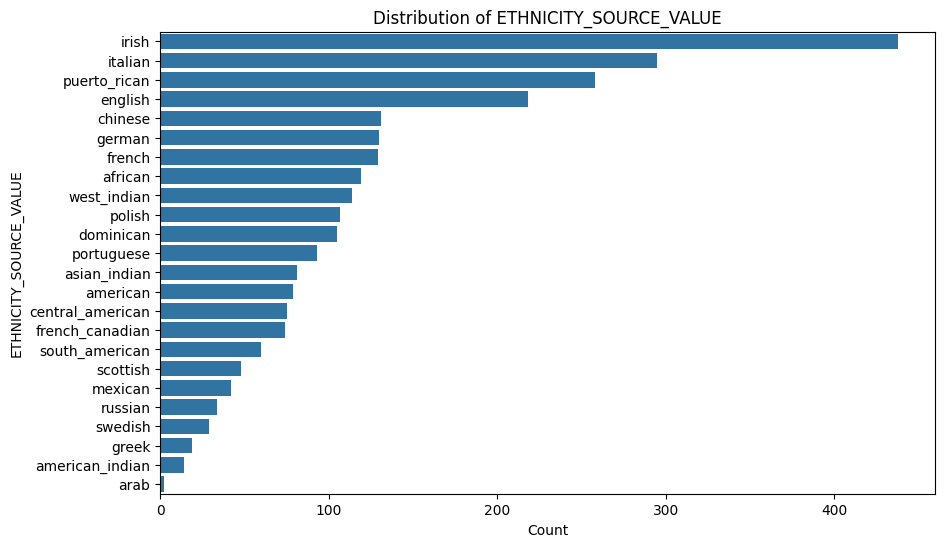

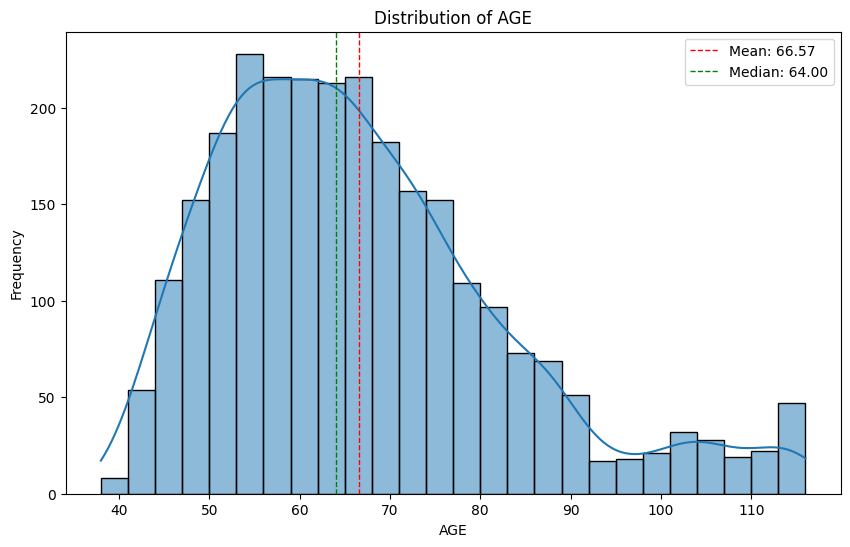

In [ ]:
for col in person.columns:
    if col in ['PERSON_ID', 'PERSON_SOURCE_VALUE']:
        continue  # Skip PERSON_ID and PERSON_SOURCE_VALUE columns

    if person[col].dtype == 'object':
        # For categorical columns, use a countplot
        plt.figure(figsize=(10, 6))
        sns.countplot(data=person, y=col, order=person[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()
    elif person[col].dtype in ['int64', 'float64']:
        # For numerical columns, use a histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(data=person, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Add mean or median line to the histogram
        mean_val = person[col].mean()
        median_val = person[col].median()

        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
        plt.legend()

        plt.show()

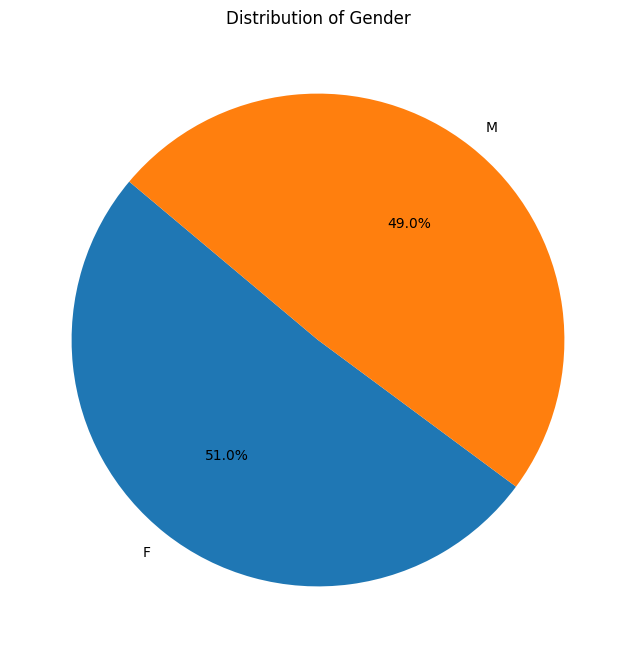

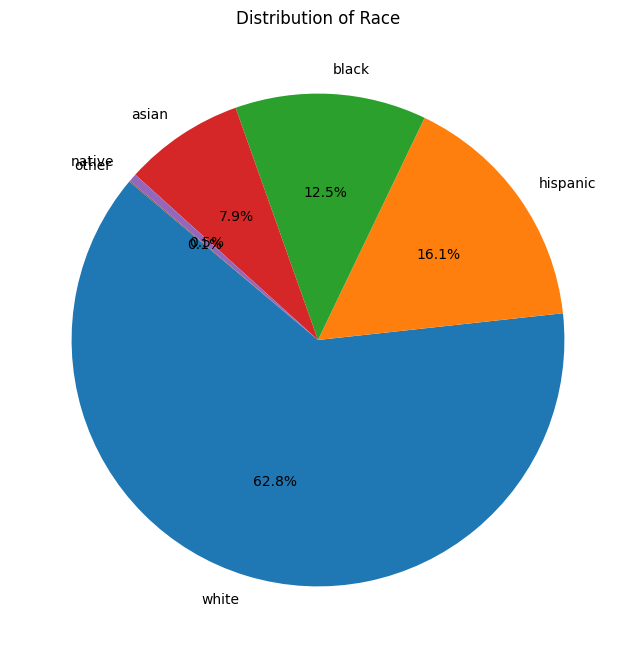

In [ ]:
# Pie chart for Gender Distribution
gender_counts = person['GENDER_SOURCE_VALUE'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.show()

# Pie chart for Race Distribution
race_counts = person['RACE_SOURCE_VALUE'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Race')
plt.show()

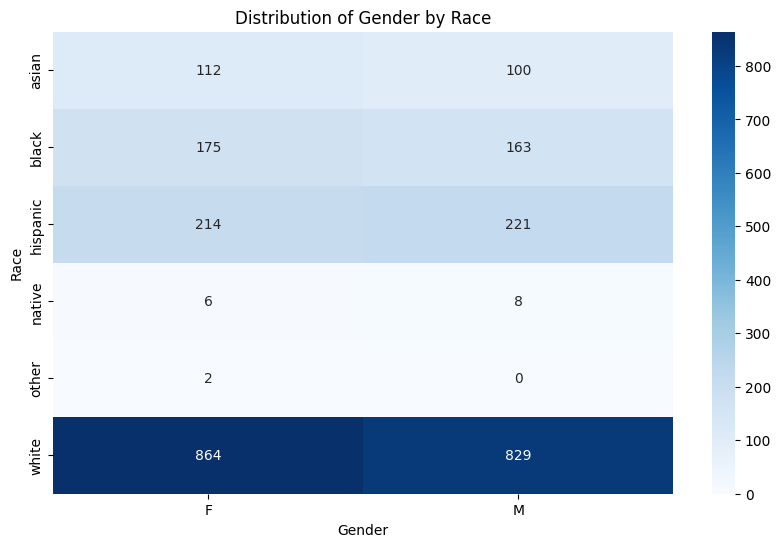

In [ ]:
# Create a cross-tabulation of Race and Gender
df_2dhist = pd.crosstab(index=person['RACE_SOURCE_VALUE'], columns=person['GENDER_SOURCE_VALUE'])

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(df_2dhist, annot=True, fmt='d', cmap='Blues')
plt.title('Distribution of Gender by Race')
plt.xlabel('Gender')
plt.ylabel('Race')
plt.show()

# **Drug Exposure Visualisation**

In [ ]:
drug_exposure = pd.read_csv('/content/drug_exposure_no_null.csv')
drug_exposure.head()

,DRUG_EXPOSURE_ID,PERSON_ID,DRUG_CONCEPT_ID,DRUG_EXPOSURE_START_DATE,DRUG_EXPOSURE_END_DATE,DRUG_TYPE_CONCEPT_ID,DAYS_SUPPLY,VISIT_OCCURRENCE_ID,DRUG_SOURCE_VALUE,DRUG_SOURCE_CONCEPT_ID
0,26318,573,40213160,1960-04-09,1960-04-09,581452,0,38004.0,10,40213160
1,60926,1332,40213198,2010-10-06,2010-10-06,581452,0,88400.0,133,40213198
2,26418,576,40213260,2017-10-25,2017-10-25,581452,0,38145.0,121,40213260
3,38712,3199,19059056,1975-08-19,1975-09-02,38000177,14,212733.0,243670,19059056
4,21897,476,40213296,2008-05-31,2008-05-31,581452,0,31764.0,52,40213296


# **DE_2008**

In [ ]:
de_2008 = pd.read_csv('/content/de_2008_without_death.csv')
de_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116352 entries, 0 to 116351
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DESYNPUF_ID               116352 non-null  object
 1   BENE_BIRTH_DT             116352 non-null  object
 2   BENE_SEX_IDENT_CD         116352 non-null  object
 3   BENE_RACE_CD              116352 non-null  object
 4   BENE_ESRD_IND             116352 non-null  object
 5   SP_STATE_CODE             116352 non-null  int64 
 6   BENE_COUNTY_CD            116352 non-null  int64 
 7   BENE_HI_CVRAGE_TOT_MONS   116352 non-null  int64 
 8   BENE_SMI_CVRAGE_TOT_MONS  116352 non-null  int64 
 9   BENE_HMO_CVRAGE_TOT_MONS  116352 non-null  int64 
 10  PLAN_CVRG_MOS_NUM         116352 non-null  int64 
 11  SP_ALZHDMTA               116352 non-null  int64 
 12  SP_CHF                    116352 non-null  int64 
 13  SP_CHRNKIDN               116352 non-null  int64 
 14  SP_C

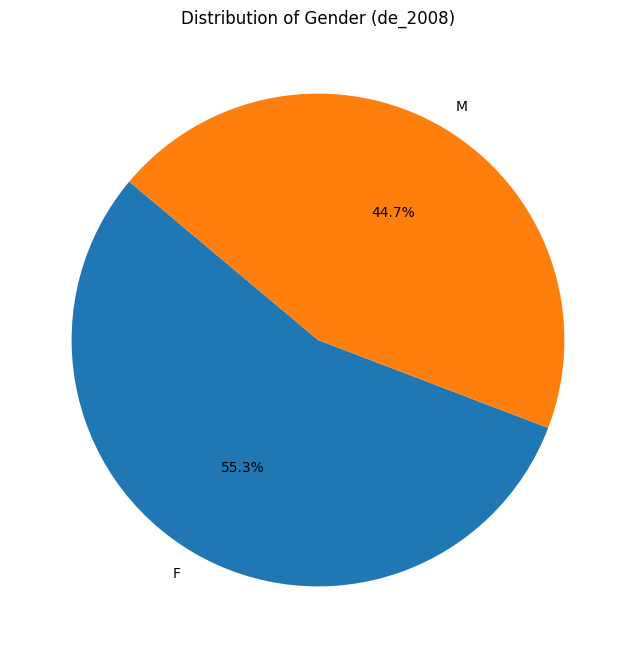

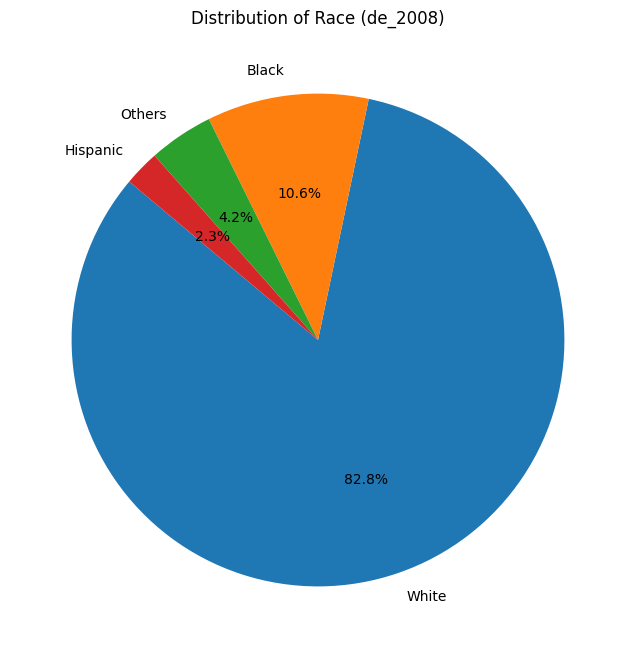

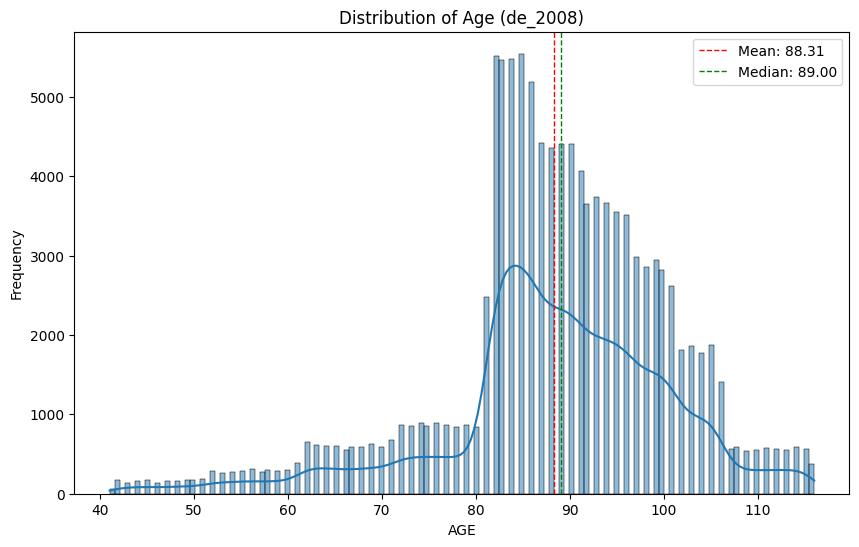

In [ ]:
# Pie chart for Gender Distribution in de_2008
gender_counts_de2008 = de_2008['BENE_SEX_IDENT_CD'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts_de2008, labels=gender_counts_de2008.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender (de_2008)')
plt.show()

# Pie chart for Race Distribution in de_2008
race_counts_de2008 = de_2008['BENE_RACE_CD'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(race_counts_de2008, labels=race_counts_de2008.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Race (de_2008)')
plt.show()

# Histogram for Age in de_2008
plt.figure(figsize=(10, 6))
sns.histplot(data=de_2008, x='AGE', kde=True)
plt.title('Distribution of Age (de_2008)')
plt.xlabel('AGE')
plt.ylabel('Frequency')

# Add mean or median line to the histogram
mean_val_age = de_2008['AGE'].mean()
median_val_age = de_2008['AGE'].median()

plt.axvline(mean_val_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val_age:.2f}')
plt.axvline(median_val_age, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val_age:.2f}')
plt.legend()

plt.show()

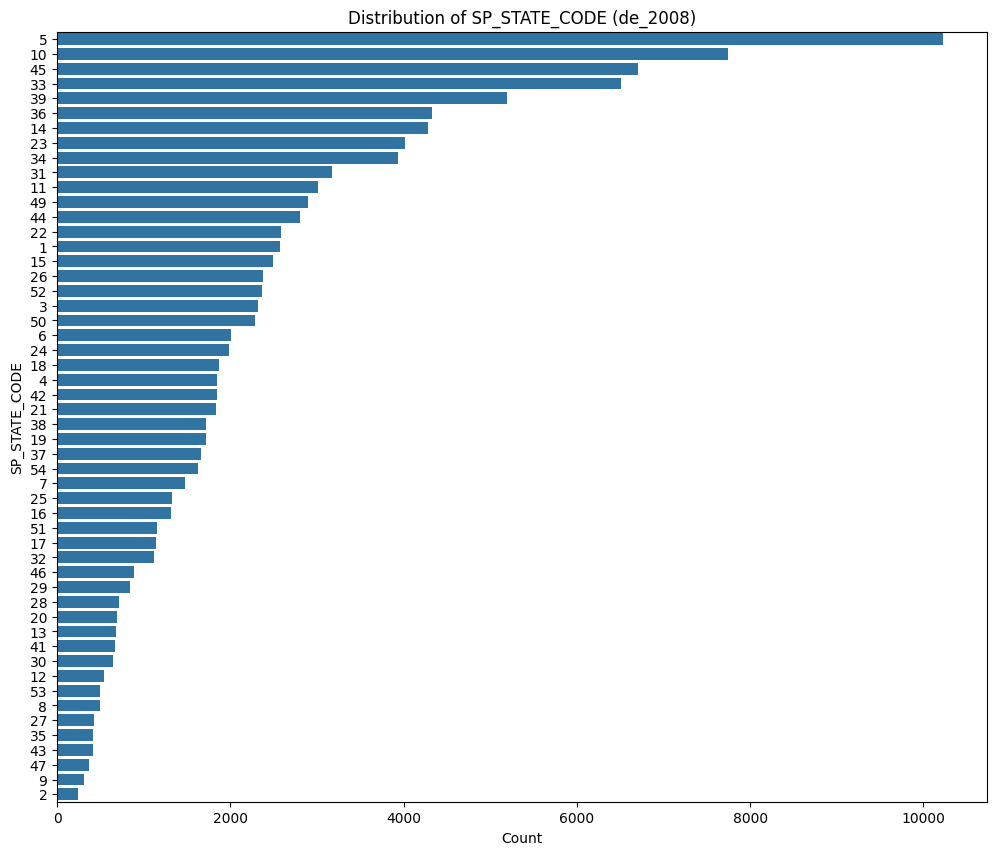

In [ ]:
# Countplot for SP_STATE_CODE
plt.figure(figsize=(12, 10))
sns.countplot(data=de_2008, y='SP_STATE_CODE', order=de_2008['SP_STATE_CODE'].value_counts().index)
plt.title('Distribution of SP_STATE_CODE (de_2008)')
plt.xlabel('Count')
plt.ylabel('SP_STATE_CODE')
plt.show()

# Countplot for BENE_COUNTY_CD
# plt.figure(figsize=(12, 20))
# sns.countplot(data=de_2008, y='BENE_COUNTY_CD', order=de_2008['BENE_COUNTY_CD'].value_counts().index)
# plt.title('Distribution of BENE_COUNTY_CD (de_2008)')
# plt.xlabel('Count')
# plt.ylabel('BENE_COUNTY_CD')
# plt.show()

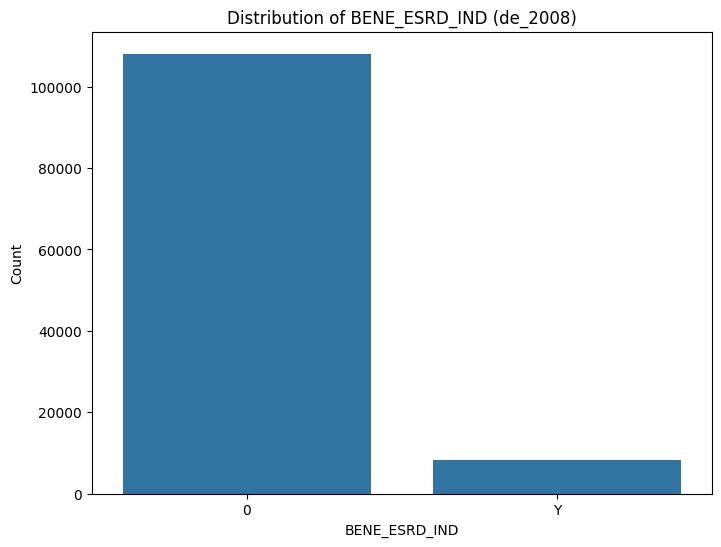

In [ ]:
# Countplot for BENE_ESRD_IND
plt.figure(figsize=(8, 6))
sns.countplot(data=de_2008, x='BENE_ESRD_IND')
plt.title('Distribution of BENE_ESRD_IND (de_2008)')
plt.xlabel('BENE_ESRD_IND')
plt.ylabel('Count')
plt.show()

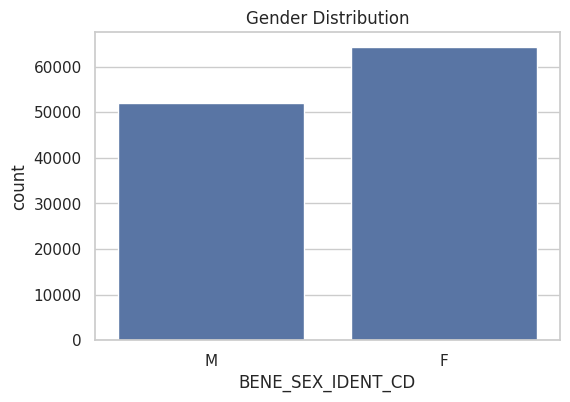

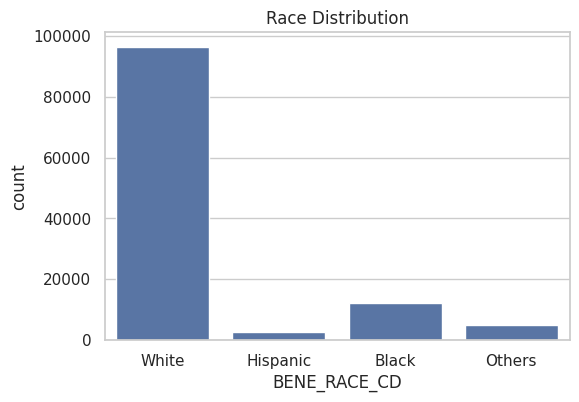

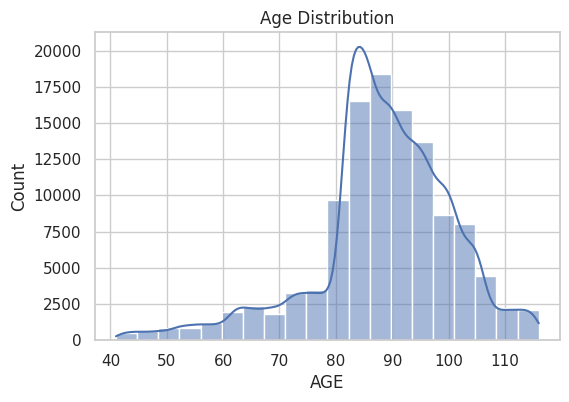

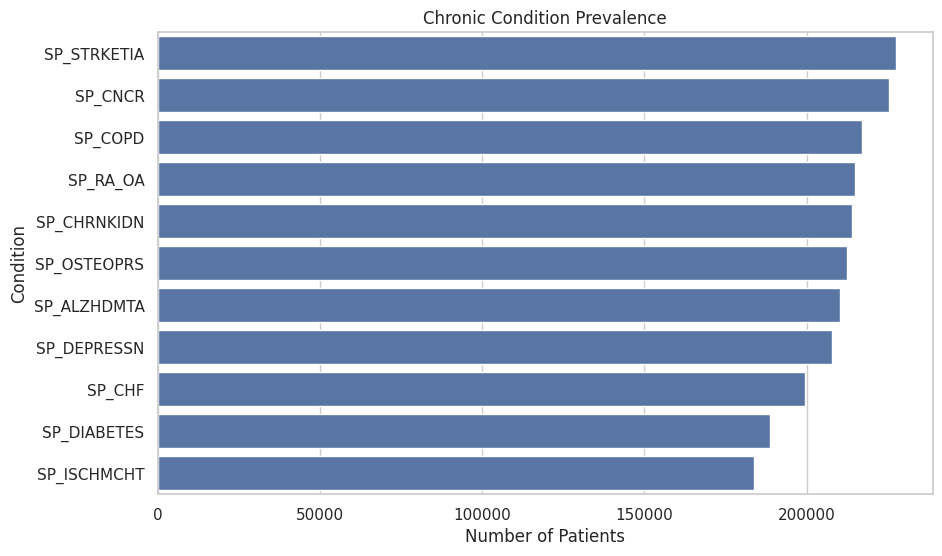

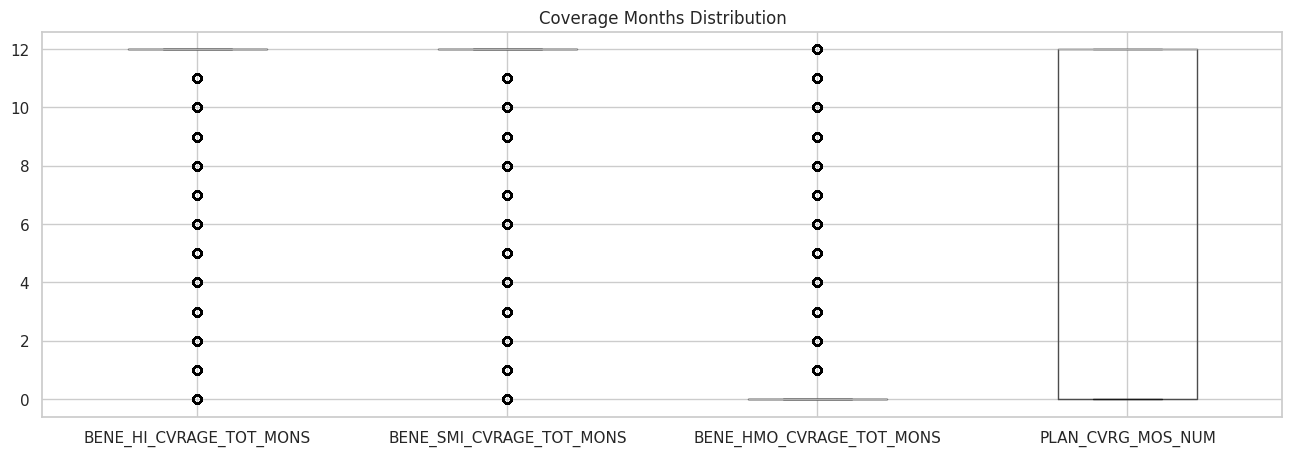

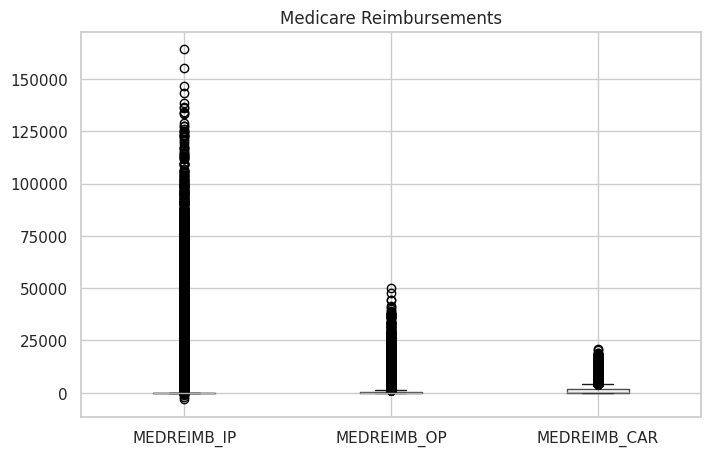

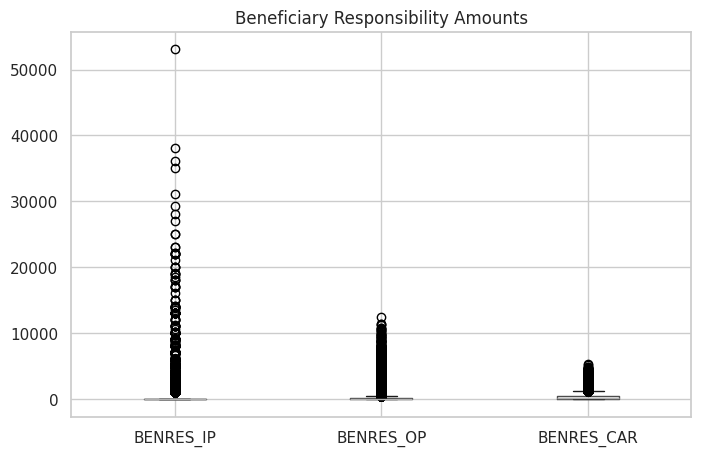

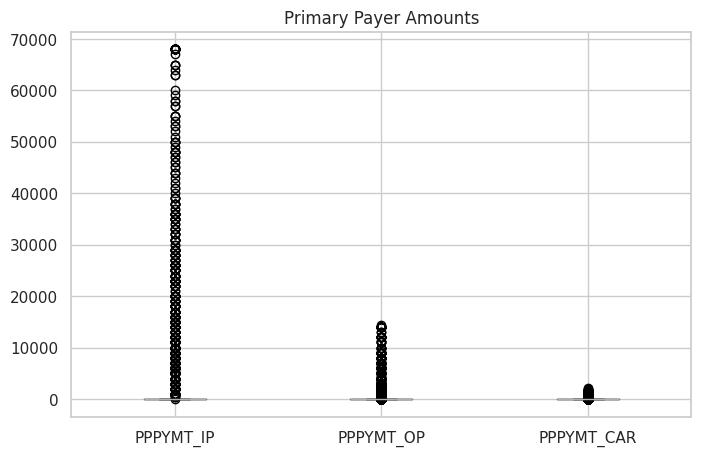

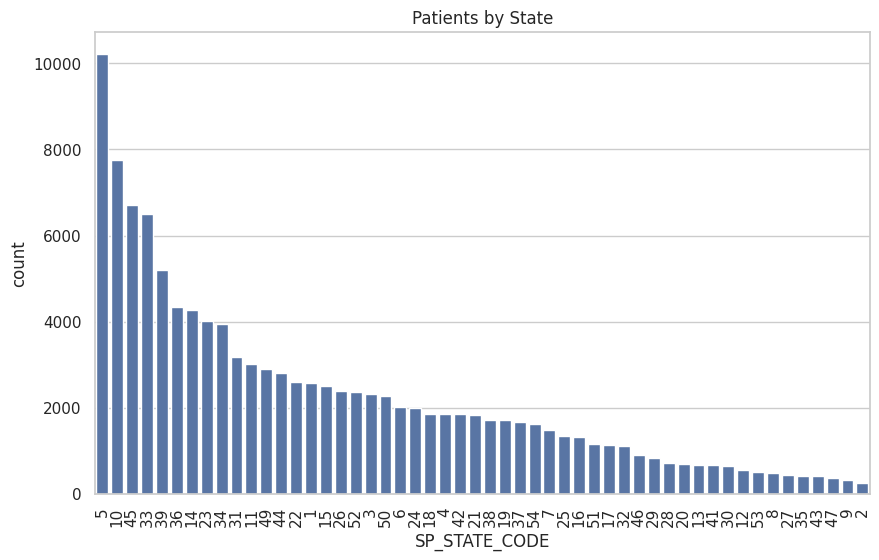

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = de_2008  # Directly use your dataframe

sns.set(style="whitegrid")

# 1️⃣ Demographics
plt.figure(figsize=(6,4))
sns.countplot(x='BENE_SEX_IDENT_CD', data=df)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='BENE_RACE_CD', data=df)
plt.title("Race Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['AGE'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

# 2️⃣ Chronic Conditions
chronic_cols = ['SP_ALZHDMTA','SP_CHF','SP_CHRNKIDN','SP_CNCR','SP_COPD',
                'SP_DEPRESSN','SP_DIABETES','SP_ISCHMCHT','SP_OSTEOPRS',
                'SP_RA_OA','SP_STRKETIA']

chronic_counts = df[chronic_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=chronic_counts.values, y=chronic_counts.index)
plt.title("Chronic Condition Prevalence")
plt.xlabel("Number of Patients")
plt.ylabel("Condition")
plt.show()

# 3️⃣ Coverage Months
coverage_cols = ['BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
                 'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM']

plt.figure(figsize=(16,5))
df[coverage_cols].boxplot()
plt.title("Coverage Months Distribution")
plt.show()

# 4️⃣ Financial Reimbursements
finance_cols = ['MEDREIMB_IP', 'MEDREIMB_OP', 'MEDREIMB_CAR']
plt.figure(figsize=(8,5))
df[finance_cols].boxplot()
plt.title("Medicare Reimbursements")
plt.show()

beneficiary_cols = ['BENRES_IP', 'BENRES_OP', 'BENRES_CAR']
plt.figure(figsize=(8,5))
df[beneficiary_cols].boxplot()
plt.title("Beneficiary Responsibility Amounts")
plt.show()

primary_cols = ['PPPYMT_IP', 'PPPYMT_OP', 'PPPYMT_CAR']
plt.figure(figsize=(8,5))
df[primary_cols].boxplot()
plt.title("Primary Payer Amounts")
plt.show()

# 5️⃣ State Code Distribution
plt.figure(figsize=(10,6))
sns.countplot(x='SP_STATE_CODE', data=df, order=df['SP_STATE_CODE'].value_counts().index)
plt.title("Patients by State")
plt.xticks(rotation=90)
plt.show()


# **DE_2009**

In [ ]:
de_2009 = pd.read_csv('/content/de_2009_without_death.csv')
de_2009.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,...,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,AGE
0,00013D2EFD8E45D1,1923-05-01,M,White,0,26,950,12,12,12,...,0,0,0,50,10,0,0,0,0,102
1,00016F745862898F,1943-01-01,M,White,0,39,230,12,12,0,...,0,0,0,0,0,0,700,240,0,82
2,0001FDD721E223DC,1936-09-01,F,White,0,39,280,12,12,0,...,0,0,0,0,0,0,0,0,0,88
3,00021CA6FF03E670,1941-06-01,M,Hispanic,0,6,290,0,0,0,...,0,0,0,0,0,0,0,0,0,84
4,00024B3D2352D2D0,1936-08-01,M,White,0,52,590,12,12,0,...,0,0,0,30,40,0,220,80,0,89


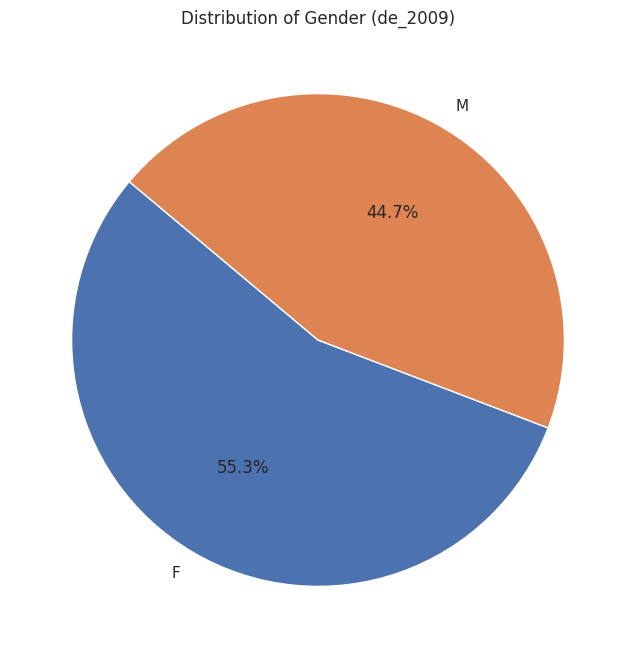

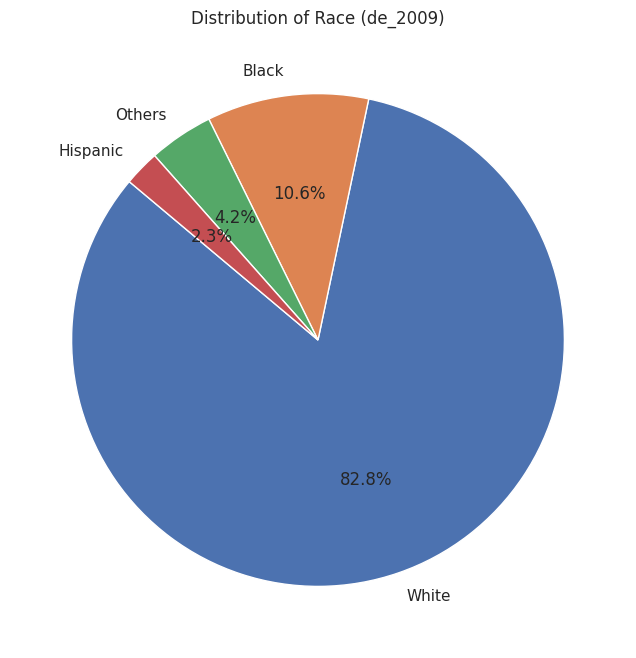

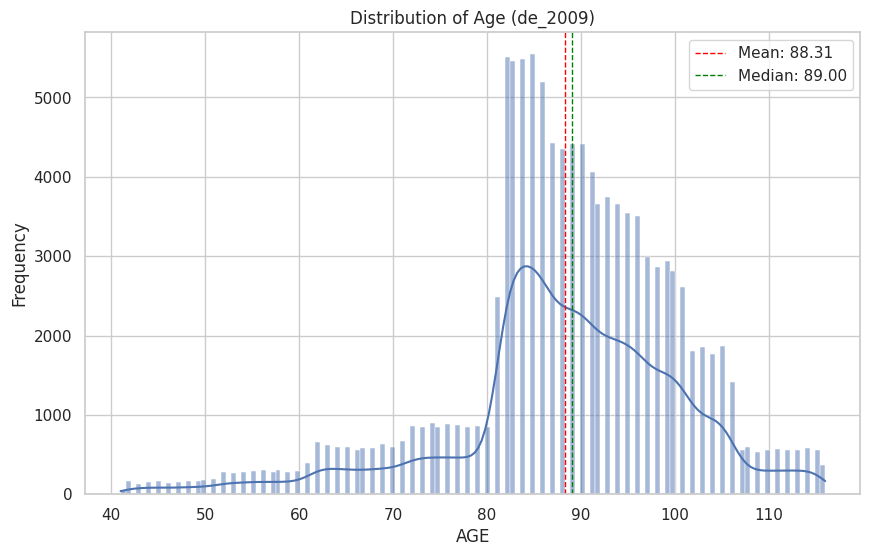

In [ ]:
# Pie chart for Gender Distribution in de_2009
gender_counts_de2009 = de_2009['BENE_SEX_IDENT_CD'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts_de2009, labels=gender_counts_de2009.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender (de_2009)')
plt.show()

# Pie chart for Race Distribution in de_2009
race_counts_de2009 = de_2009['BENE_RACE_CD'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(race_counts_de2009, labels=race_counts_de2009.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Race (de_2009)')
plt.show()

# Histogram for Age in de_2009
plt.figure(figsize=(10, 6))
sns.histplot(data=de_2009, x='AGE', kde=True)
plt.title('Distribution of Age (de_2009)')
plt.xlabel('AGE')
plt.ylabel('Frequency')

# Add mean or median line to the histogram
mean_val_age = de_2009['AGE'].mean()
median_val_age = de_2009['AGE'].median()

plt.axvline(mean_val_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val_age:.2f}')
plt.axvline(median_val_age, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val_age:.2f}')
plt.legend()

plt.show()

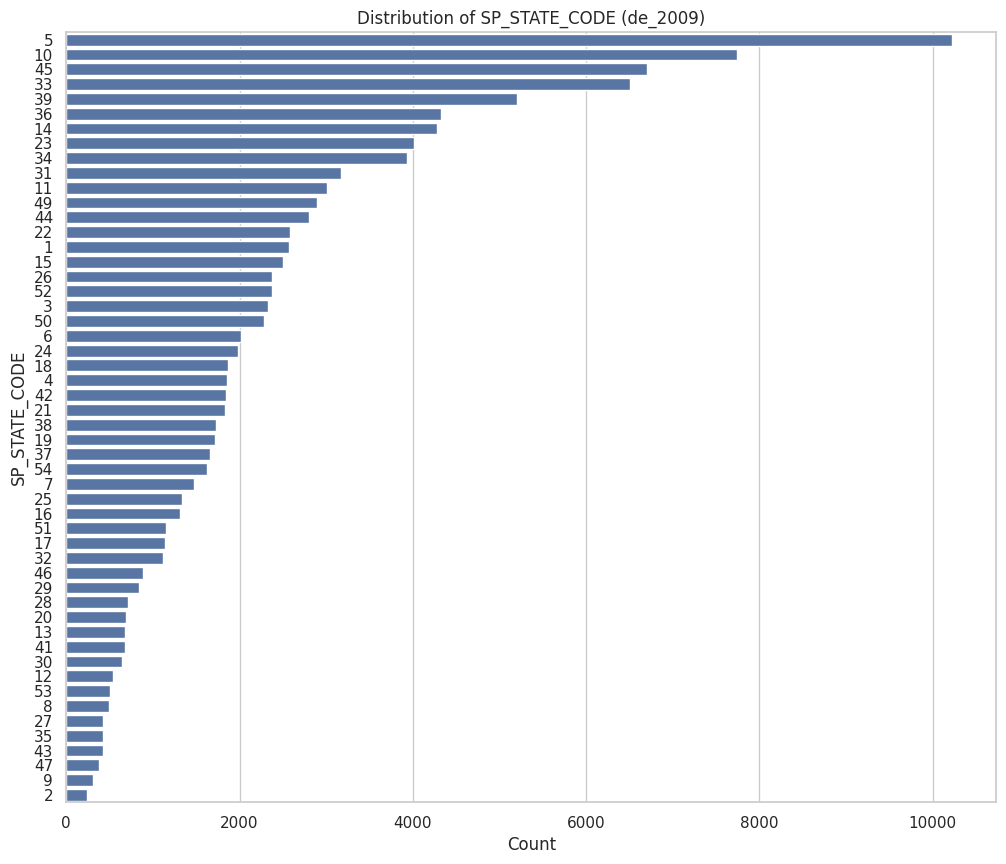

In [ ]:
# Countplot for SP_STATE_CODE
plt.figure(figsize=(12, 10))
sns.countplot(data=de_2009, y='SP_STATE_CODE', order=de_2009['SP_STATE_CODE'].value_counts().index)
plt.title('Distribution of SP_STATE_CODE (de_2009)')
plt.xlabel('Count')
plt.ylabel('SP_STATE_CODE')
plt.show()

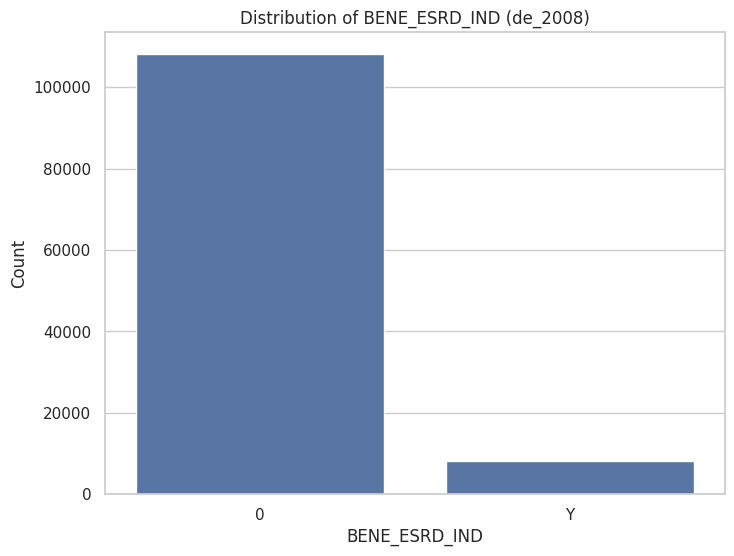

In [ ]:
# Countplot for BENE_ESRD_IND
plt.figure(figsize=(8, 6))
sns.countplot(data=de_2009, x='BENE_ESRD_IND')
plt.title('Distribution of BENE_ESRD_IND (de_2009)')
plt.xlabel('BENE_ESRD_IND')
plt.ylabel('Count')
plt.show()

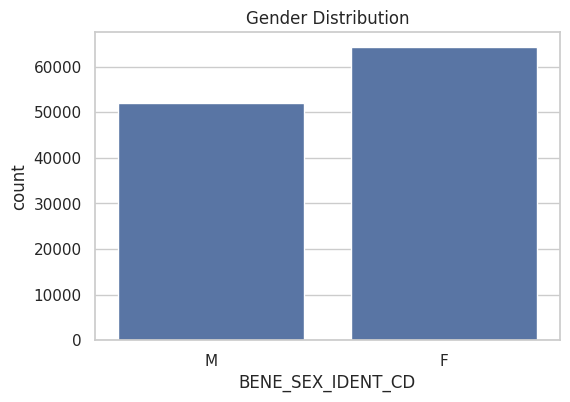

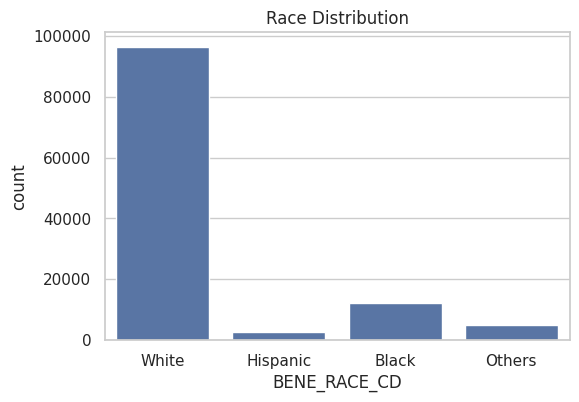

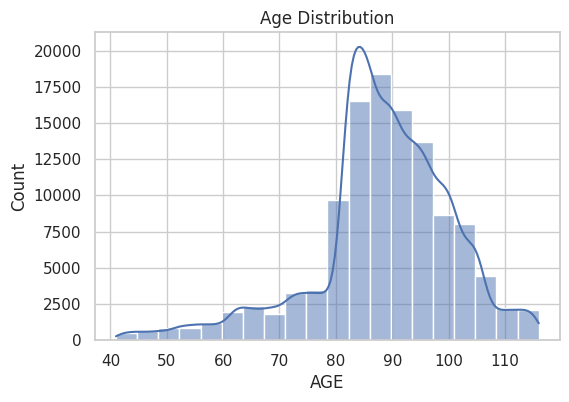

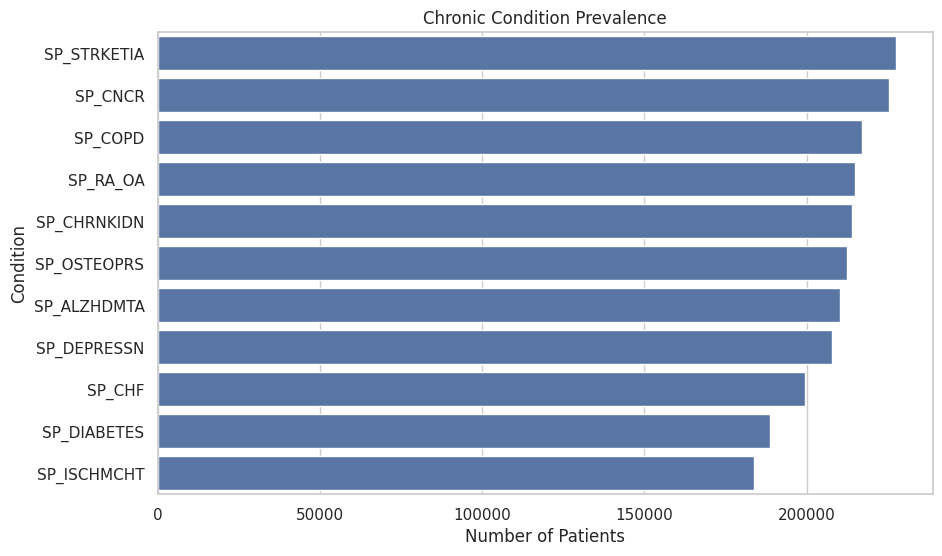

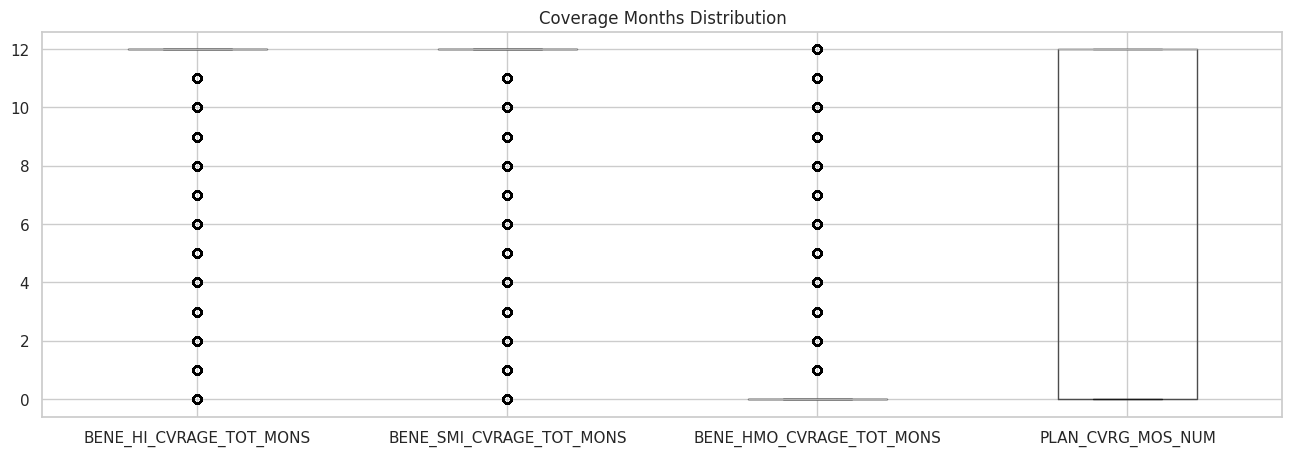

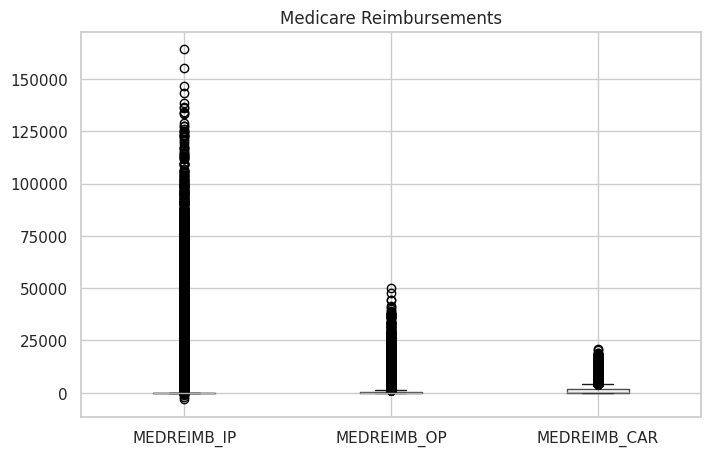

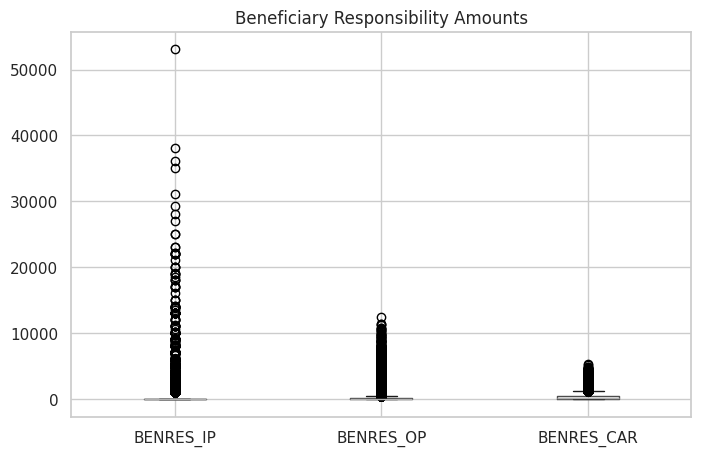

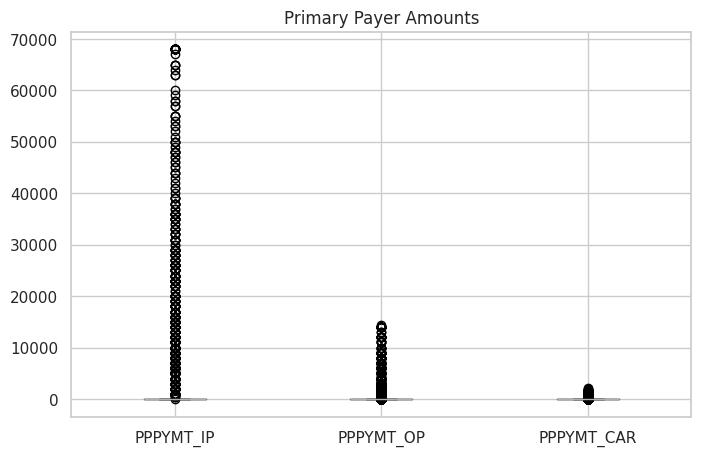

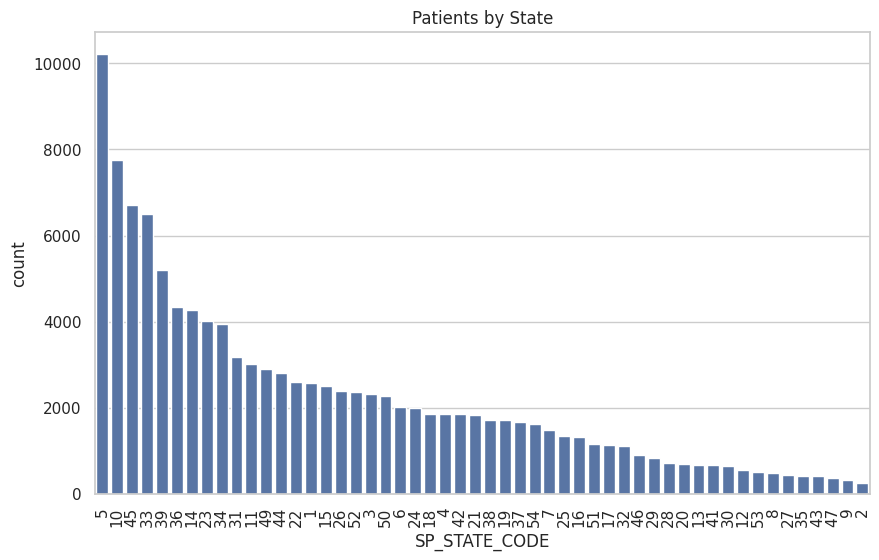

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = de_2009  # Directly use your dataframe

sns.set(style="whitegrid")

# 1️⃣ Demographics
plt.figure(figsize=(6,4))
sns.countplot(x='BENE_SEX_IDENT_CD', data=df)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='BENE_RACE_CD', data=df)
plt.title("Race Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['AGE'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

# 2️⃣ Chronic Conditions
chronic_cols = ['SP_ALZHDMTA','SP_CHF','SP_CHRNKIDN','SP_CNCR','SP_COPD',
                'SP_DEPRESSN','SP_DIABETES','SP_ISCHMCHT','SP_OSTEOPRS',
                'SP_RA_OA','SP_STRKETIA']

chronic_counts = df[chronic_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=chronic_counts.values, y=chronic_counts.index)
plt.title("Chronic Condition Prevalence")
plt.xlabel("Number of Patients")
plt.ylabel("Condition")
plt.show()

# 3️⃣ Coverage Months
coverage_cols = ['BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
                 'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM']

plt.figure(figsize=(16,5))
df[coverage_cols].boxplot()
plt.title("Coverage Months Distribution")
plt.show()

# 4️⃣ Financial Reimbursements
finance_cols = ['MEDREIMB_IP', 'MEDREIMB_OP', 'MEDREIMB_CAR']
plt.figure(figsize=(8,5))
df[finance_cols].boxplot()
plt.title("Medicare Reimbursements")
plt.show()

beneficiary_cols = ['BENRES_IP', 'BENRES_OP', 'BENRES_CAR']
plt.figure(figsize=(8,5))
df[beneficiary_cols].boxplot()
plt.title("Beneficiary Responsibility Amounts")
plt.show()

primary_cols = ['PPPYMT_IP', 'PPPYMT_OP', 'PPPYMT_CAR']
plt.figure(figsize=(8,5))
df[primary_cols].boxplot()
plt.title("Primary Payer Amounts")
plt.show()

# 5️⃣ State Code Distribution
plt.figure(figsize=(10,6))
sns.countplot(x='SP_STATE_CODE', data=df, order=df['SP_STATE_CODE'].value_counts().index)
plt.title("Patients by State")
plt.xticks(rotation=90)
plt.show()


# **DE_2010**

In [ ]:
de_2010 = pd.read_csv('/content/de_2010_without_death.csv')
de_2010.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,...,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,AGE
0,00013D2EFD8E45D1,1923-05-01,M,White,0,26,950,12,12,12,...,4000,1100,0,0,0,0,90,30,0,102
1,00016F745862898F,1943-01-01,M,White,Y,39,230,12,12,0,...,16000,1100,0,0,0,0,930,150,0,82
2,0001FDD721E223DC,1936-09-01,F,White,0,39,280,12,12,0,...,0,0,0,0,0,0,0,0,0,88
3,00021CA6FF03E670,1941-06-01,M,Hispanic,0,6,290,12,12,0,...,0,0,0,0,0,0,0,0,0,84
4,00024B3D2352D2D0,1936-08-01,M,White,0,52,590,9,12,12,...,0,0,0,40,0,0,590,60,0,89


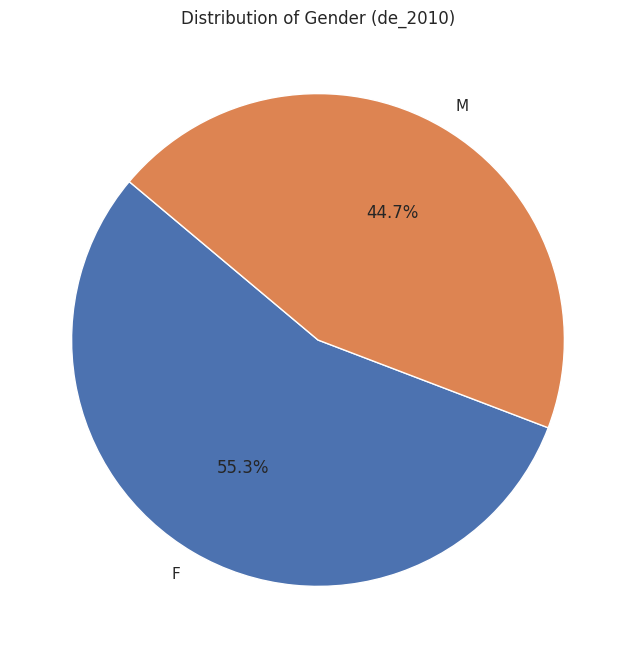

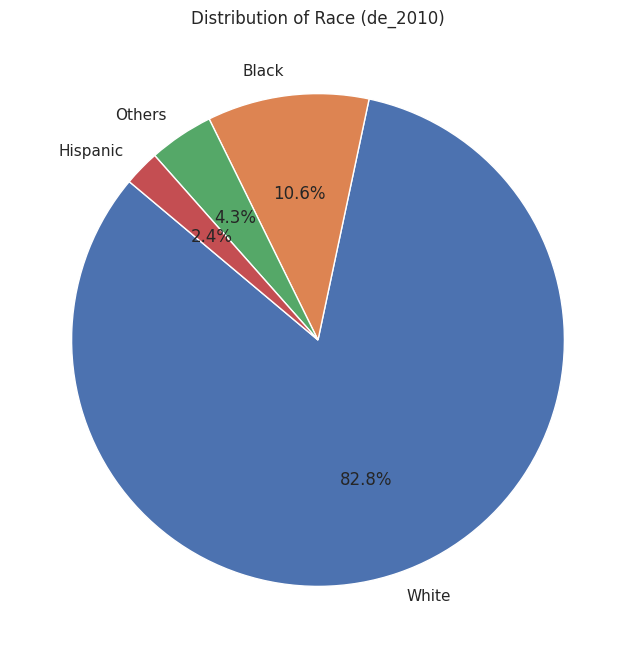

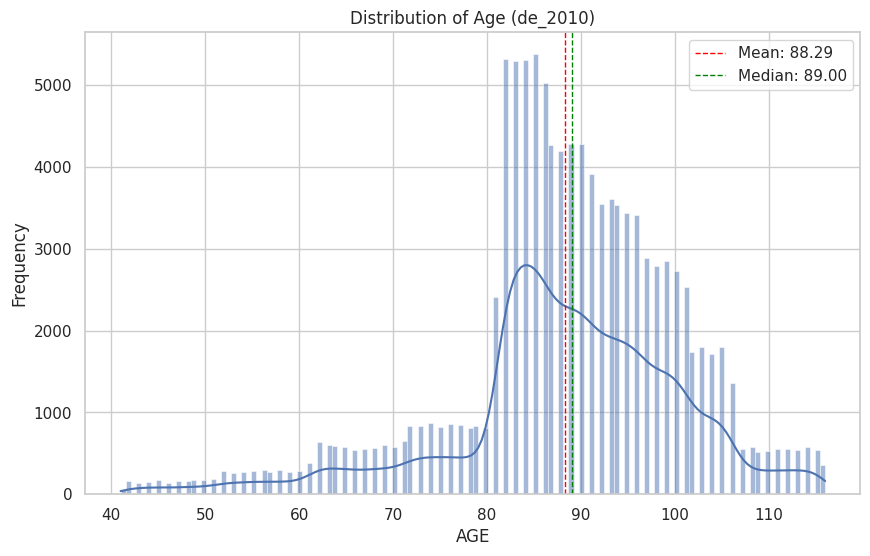

In [ ]:
# Pie chart for Gender Distribution in de_2010
gender_counts_de2010 = de_2010['BENE_SEX_IDENT_CD'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts_de2010, labels=gender_counts_de2010.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender (de_2010)')
plt.show()

# Pie chart for Race Distribution in de_2010
race_counts_de2010 = de_2010['BENE_RACE_CD'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(race_counts_de2010, labels=race_counts_de2010.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Race (de_2010)')
plt.show()

# Histogram for Age in de_2010
plt.figure(figsize=(10, 6))
sns.histplot(data=de_2010, x='AGE', kde=True)
plt.title('Distribution of Age (de_2010)')
plt.xlabel('AGE')
plt.ylabel('Frequency')

# Add mean or median line to the histogram
mean_val_age = de_2010['AGE'].mean()
median_val_age = de_2010['AGE'].median()

plt.axvline(mean_val_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val_age:.2f}')
plt.axvline(median_val_age, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val_age:.2f}')
plt.legend()

plt.show()

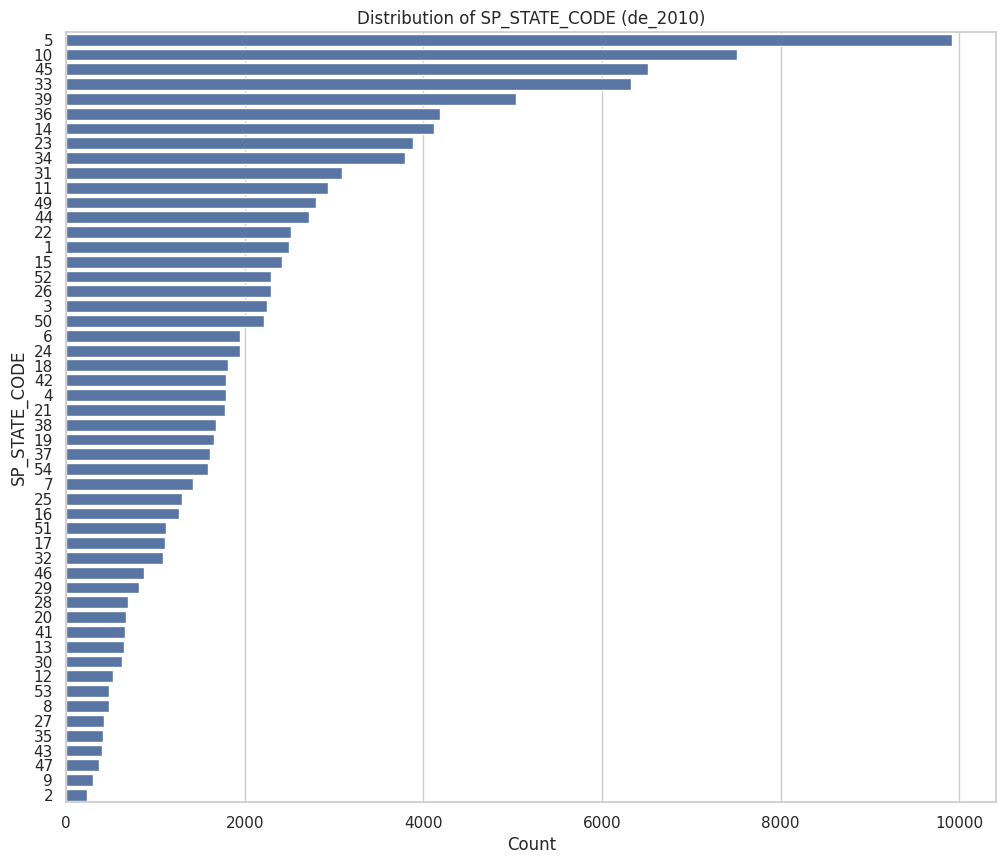

In [ ]:
# Countplot for SP_STATE_CODE
plt.figure(figsize=(12, 10))
sns.countplot(data=de_2010, y='SP_STATE_CODE', order=de_2010['SP_STATE_CODE'].value_counts().index)
plt.title('Distribution of SP_STATE_CODE (de_2010)')
plt.xlabel('Count')
plt.ylabel('SP_STATE_CODE')
plt.show()

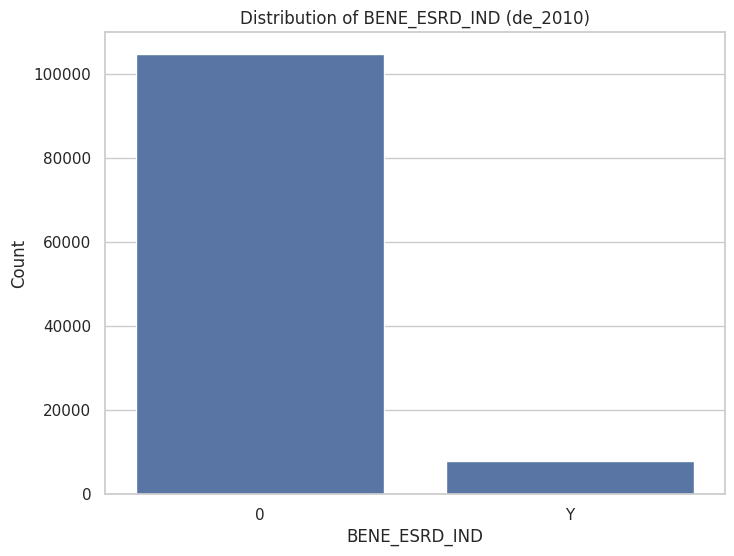

In [ ]:
# Countplot for BENE_ESRD_IND
plt.figure(figsize=(8, 6))
sns.countplot(data=de_2010, x='BENE_ESRD_IND')
plt.title('Distribution of BENE_ESRD_IND (de_2010)')
plt.xlabel('BENE_ESRD_IND')
plt.ylabel('Count')
plt.show()

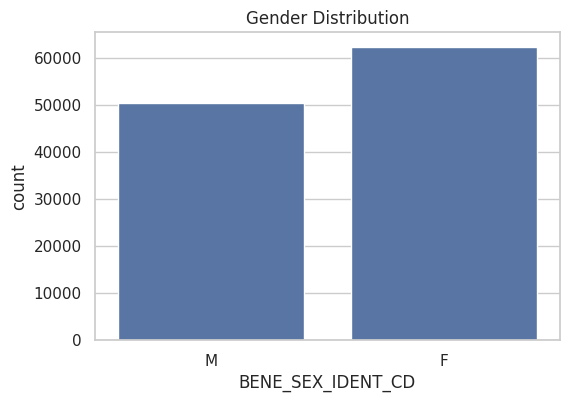

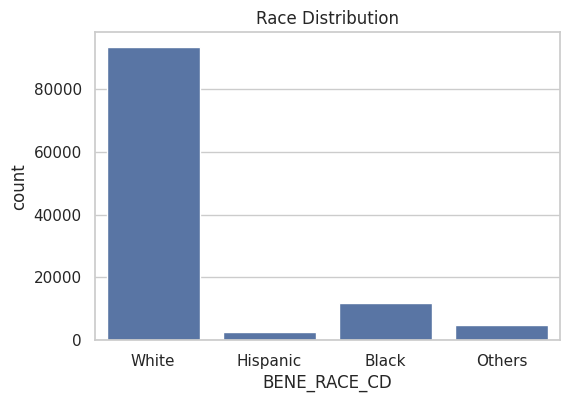

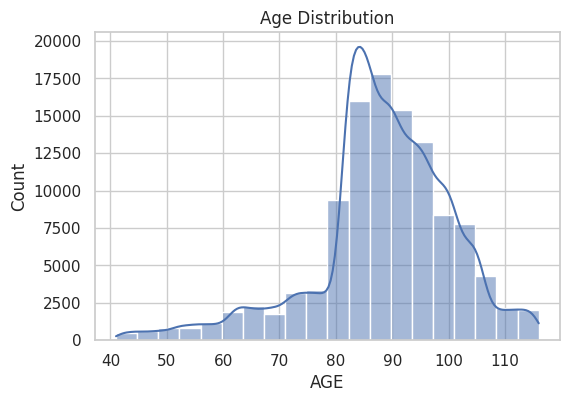

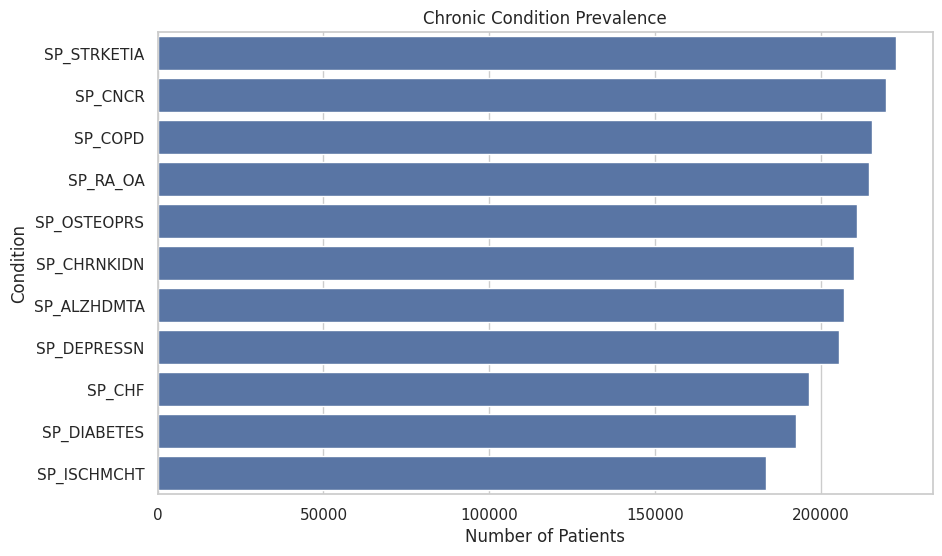

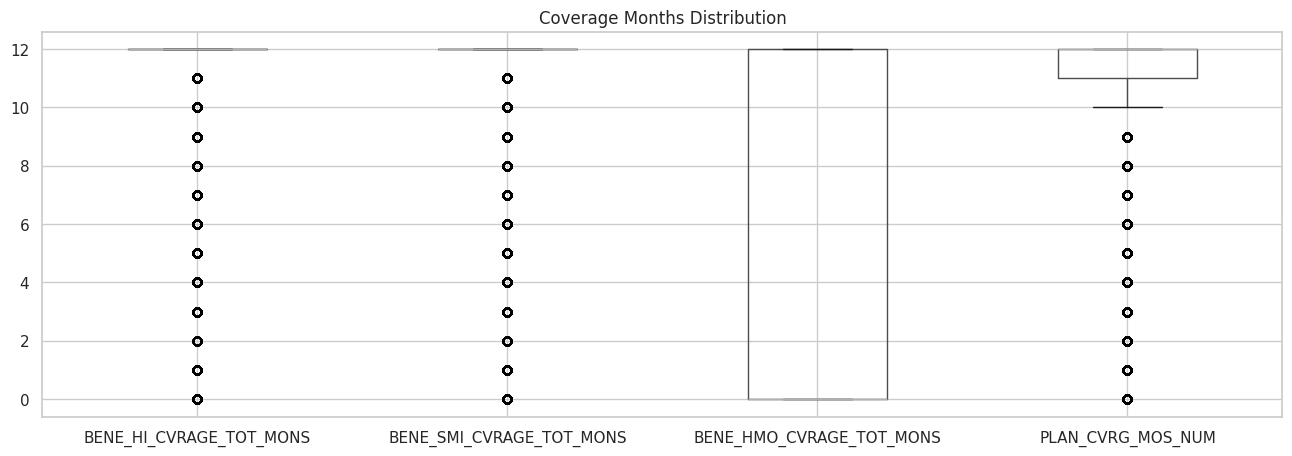

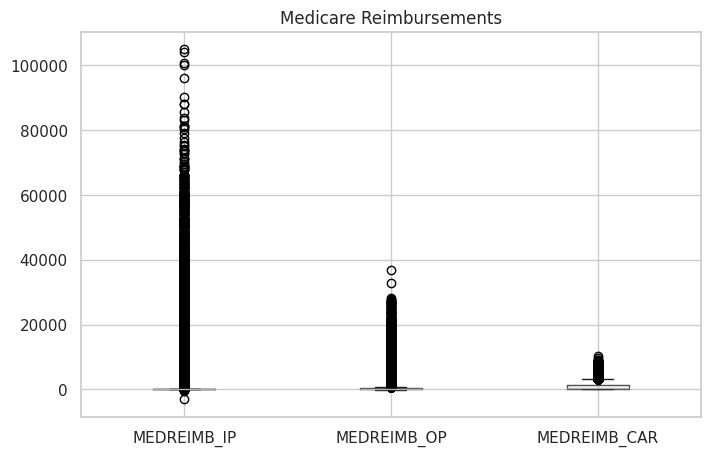

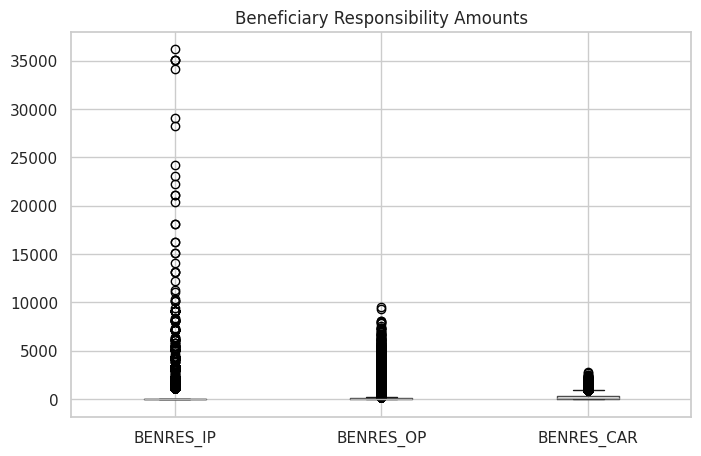

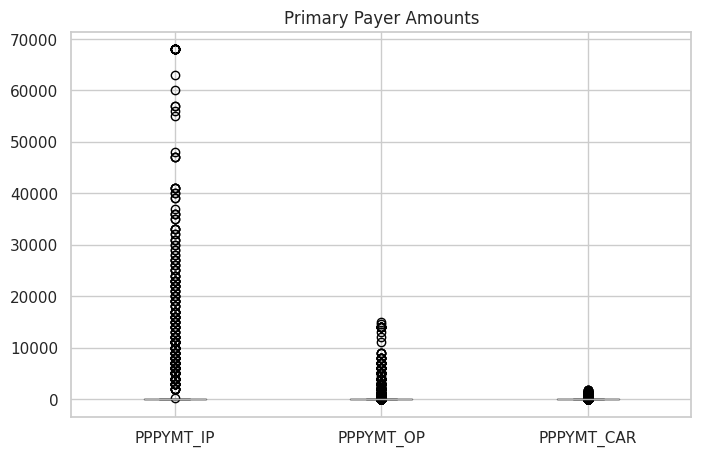

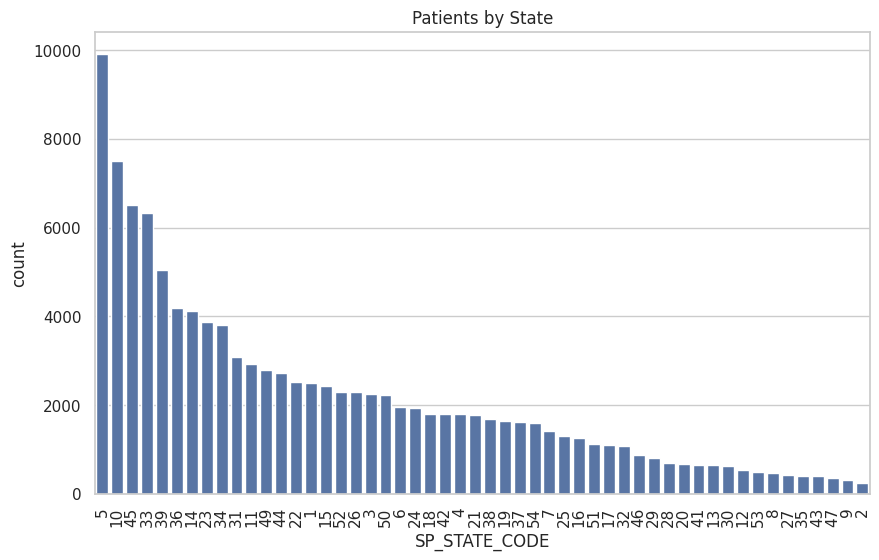

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = de_2010  # Directly use your dataframe

sns.set(style="whitegrid")

# 1️⃣ Demographics
plt.figure(figsize=(6,4))
sns.countplot(x='BENE_SEX_IDENT_CD', data=df)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='BENE_RACE_CD', data=df)
plt.title("Race Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['AGE'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

# 2️⃣ Chronic Conditions
chronic_cols = ['SP_ALZHDMTA','SP_CHF','SP_CHRNKIDN','SP_CNCR','SP_COPD',
                'SP_DEPRESSN','SP_DIABETES','SP_ISCHMCHT','SP_OSTEOPRS',
                'SP_RA_OA','SP_STRKETIA']

chronic_counts = df[chronic_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=chronic_counts.values, y=chronic_counts.index)
plt.title("Chronic Condition Prevalence")
plt.xlabel("Number of Patients")
plt.ylabel("Condition")
plt.show()

# 3️⃣ Coverage Months
coverage_cols = ['BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
                 'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM']

plt.figure(figsize=(16,5))
df[coverage_cols].boxplot()
plt.title("Coverage Months Distribution")
plt.show()

# 4️⃣ Financial Reimbursements
finance_cols = ['MEDREIMB_IP', 'MEDREIMB_OP', 'MEDREIMB_CAR']
plt.figure(figsize=(8,5))
df[finance_cols].boxplot()
plt.title("Medicare Reimbursements")
plt.show()

beneficiary_cols = ['BENRES_IP', 'BENRES_OP', 'BENRES_CAR']
plt.figure(figsize=(8,5))
df[beneficiary_cols].boxplot()
plt.title("Beneficiary Responsibility Amounts")
plt.show()

primary_cols = ['PPPYMT_IP', 'PPPYMT_OP', 'PPPYMT_CAR']
plt.figure(figsize=(8,5))
df[primary_cols].boxplot()
plt.title("Primary Payer Amounts")
plt.show()

# 5️⃣ State Code Distribution
plt.figure(figsize=(10,6))
sns.countplot(x='SP_STATE_CODE', data=df, order=df['SP_STATE_CODE'].value_counts().index)
plt.title("Patients by State")
plt.xticks(rotation=90)
plt.show()
